In [3]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [4]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [5]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

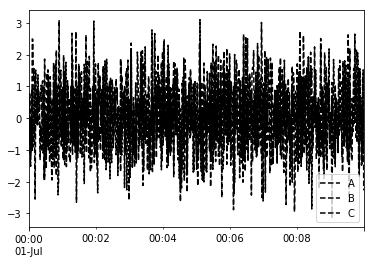

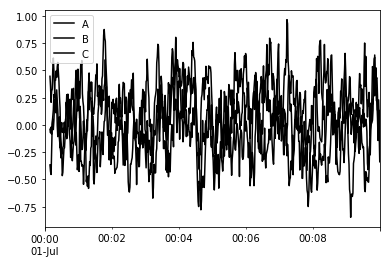

In [6]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [7]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.165193,0.517549,-0.320003
2016-07-01 00:00:02,-0.479416,0.595654,-0.495887
2016-07-01 00:00:03,-0.793060,0.053100,-0.420332
2016-07-01 00:00:04,-0.565006,0.033667,-0.537327
2016-07-01 00:00:05,-0.226923,-0.168153,-0.601699
2016-07-01 00:00:06,-0.388917,-0.222446,0.035704
2016-07-01 00:00:07,-0.411150,0.019442,0.499852
2016-07-01 00:00:08,-0.379892,-0.144844,0.622489
2016-07-01 00:00:09,-0.336225,-0.080100,0.781223


In [8]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [9]:
df.head()

,A,B,C,D
2016-06-06,-0.274664,-0.318070,0.671039,-1.645347
2016-06-07,0.912479,-0.856011,-0.287467,0.323794
2016-06-08,-0.104600,0.037877,-1.447603,1.888876
2016-06-09,-0.553463,0.483297,-0.184360,-0.697710
2016-06-10,0.664999,0.014269,0.174960,-1.301146


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C757595A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002C7576029E8>], dtype=object)

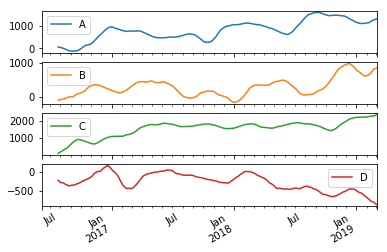

In [10]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [11]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.378450,0.558966,0.747506,0.979069


In [12]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.181575,-0.746075,0.527306,-1.483450
2016-06-08,0.298788,-0.876118,-0.003140,-0.799858
2016-06-09,0.219029,-0.820315,-0.314453,-0.632490
2016-06-10,0.304174,-0.783980,-0.466248,-0.792299


In [13]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

more stable statistic, it shows all the data.

you want to expand all data when there is the need to to a close detail analysis of the data, in the other hand if you want to look just have a fast ad-hoc analysis of the shown data, you might want to just not expand

In [14]:
# EWMA
# Why use EWMA?

Exponentially-Weighted Moving Average

In financial data, where there is a high variance in stock price, meaning a high volatile historical price change. It might be better to use EWMA to smooth the data

In [15]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [16]:
n_df = df.rolling(window = 35)
# n_df
n_df = n_df['A'].aggregate([np.mean, np.std])
n_df.head(2)

,mean,std
2016-06-06,NaN,NaN
2016-06-07,NaN,NaN


In [19]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

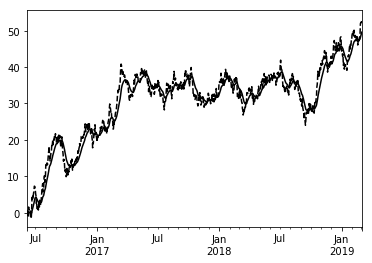

In [18]:
import matplotlib.pyplot as plt

df['C'].plot(style='k--')

df['C'].ewm(span=20).mean().plot(style='k')